# Bagging, Boosting, and Random Forests

Decision trees have many advantages.
They are easy to interpret.
To make a prediction, you only need to follow a set of rules. 
Predictions are also data-driven, not having to follow a more structured linear pattern like the past model we studied.
Regression trees also have two big disadvantages: (i) they typically have poor performance compared to other regression models, and (ii) suffer from high variance.

## Goal of an ensemble

The goal of an ensemble model is to combine many weak predictors, and in doing so, build a model that has lower variance and bias.
This phenomena occurs in simple statistics.
Given a sample of data $Y_{1},Y_{2},\cdots,Y_{n}$ the average $\bar{Y}$ has a Normal distribution with variance $\sigma^{2}/n$. 
The average lowers the variance. A single regression tree tends to have high variance, and by combining many different regression trees in an ensemble, attempts to lower the variance.

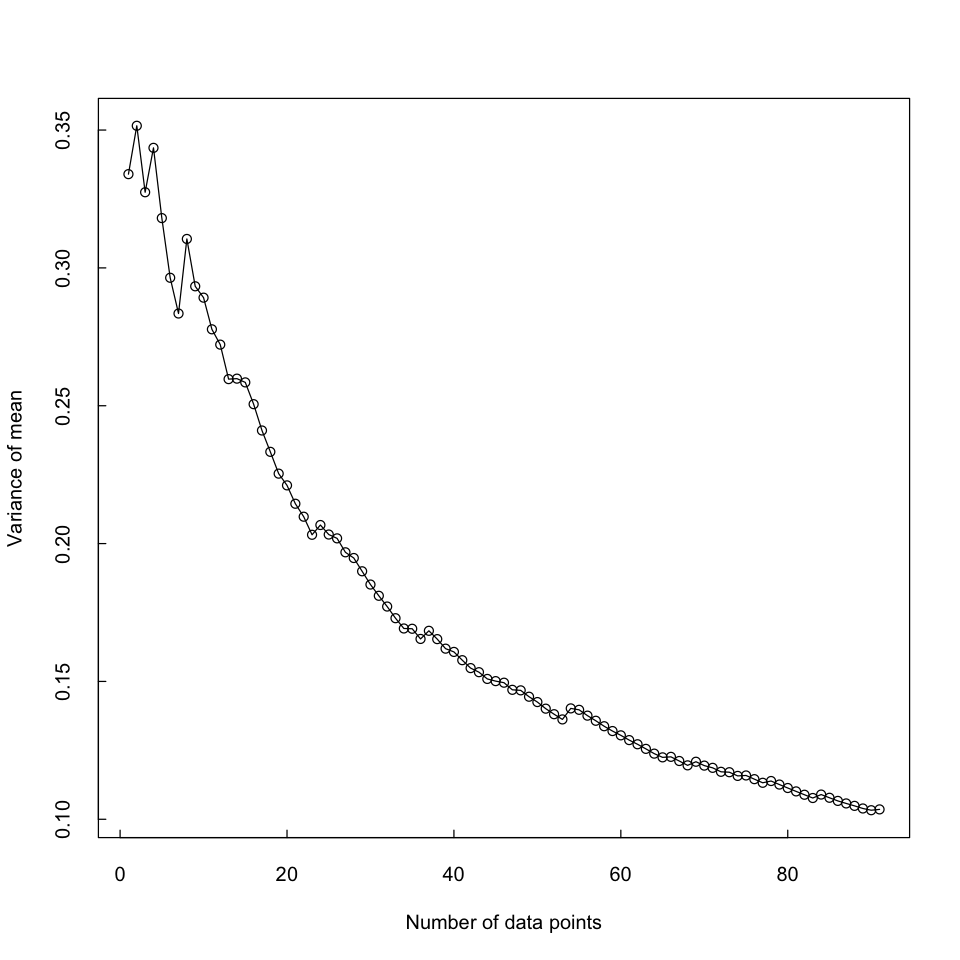

In [1]:
y = rnorm(10^2)
N = length(y)
vars = rep(0,N-10)

j=1
for(i in 10:N){
    vars[j] = sd(y[1:i])/sqrt(i)
    j=j+1
}

#plot
options(repr.plot.width=8,repr.plot.height=8)
plot(vars, ylab="Variance of mean", xlab="Number of data points",tck=0.01)
lines(vars)

## Bagging for a continuous target

Boot-strap aggregation (bagging) constructs $B$ training data sets by sampling, at random, observations from our original dataset until we generate a Bootstrapped dataset of the same size as our original training data.
A TBR model is trained on each bootstrapped dataset $(\text{TBR}_{b}(x))$, and the final Bagged TBR model is defined as the average of all individual $\text{TBR}_{b}$ models

$$
    \text{TBR}_{\text{bagged}}(x) = \frac{1}{B} \sum_{b=1}^{B} \text{TBR}_{b}(x) 
$$

[1] 8468.547

ERROR: Error in data.frame(truth = examples$medv, predicted = yhats): arguments imply differing number of rows: 0, 300


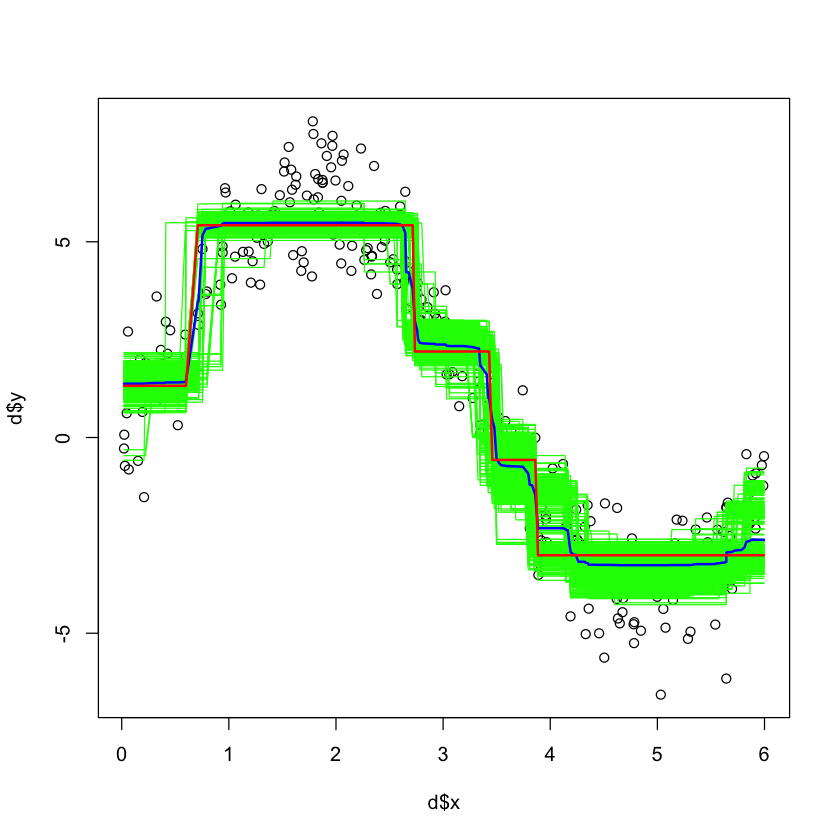

In [23]:
#require(MASS)
#data(Boston)
#plot(Boston$rm,Boston$medv)

d = read.csv('exampleData.csv')
plot(d$x,d$y)

# Single tree
require(rpart)
TBR = rpart(y~x,data=d)
#TBR = prune(TBR,cp=0.01)

examples       = d[order(d$x),]
yhatsSingle    = predict(TBR,examples)

truthAndPredictions=data.frame(truth=examples$x,predicted=yhatsSingle)
sum((truthAndPredictions$truth-truthAndPredictions$predicted)^2)

# bootstrap function
bootstrapTrainingData = function(){
    nObs = 1:nrow(d)
    boostrap = d[sample(nObs,replace=TRUE),]
    return(boostrap)
}

# Bagged TBR model
B=400
TBR_boostrap = list()
for (b in 1:B){
    bStrap = bootstrapTrainingData()
    TBR_b = rpart(y~x,data=bStrap)
    TBR_b = prune(TBR_b,cp=0.01)
    TBR_boostrap[[b]] = TBR_b
}

# make a prediction
yhats  = predict(TBR_boostrap[[1]],examples)
for (b in 2:B){
    yhats  = yhats+predict(TBR_boostrap[[b]],examples)
    
    predictions = predict(TBR_boostrap[[b]],examples)
    lines(examples$x,predictions,col='green')
} 
yhats = yhats/B
lines(examples$x,yhats,col='blue',lwd=2)

lines(examples$x,yhatsSingle,col='red',lwd=2)

truthAndPredictions=data.frame(truth=examples$medv,predicted=yhats)
sum((truthAndPredictions$truth-truthAndPredictions$predicted)^2)

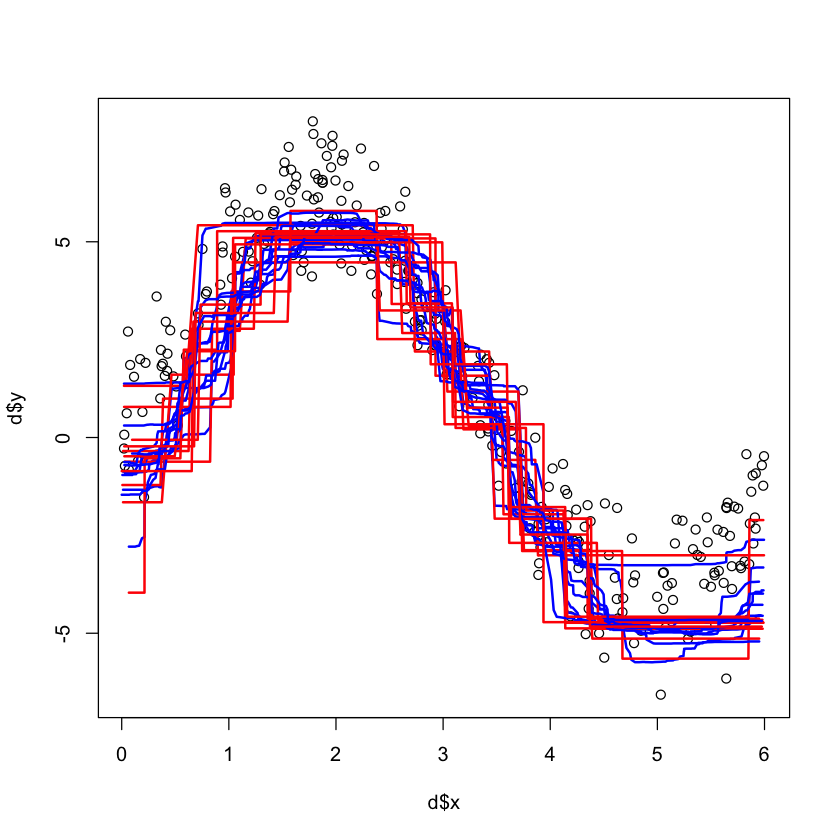

In [24]:

plot(d$x,d$y)
lines(examples$x,yhats,col='blue',lwd=2)
lines(examples$x,yhatsSingle,col='red',lwd=2)

for (k in 1:10){
    d = read.csv(sprintf('exampleData_%02d.csv',k))
#    par(new=TRUE)
#    plot(d$x,d$y)

    TBR_1 = TBR
    yhatsSingle1 = yhatsSingle

    TBRnew = rpart(y~x,data=d)
    TBRnew = prune(TBRnew,cp=0.01)

    examples       = d[order(d$x),]
    yhatsSingle    = predict(TBRnew,examples)


    TBR_bootStrap1 = TBR_boostrap
    yhats1 = yhats

    # bootstrap function
    bootstrapTrainingData = function(){
        nObs = 1:nrow(d)
        boostrap = d[sample(nObs,replace=TRUE),]
        return(boostrap)
    }

    # Bagged TBR model
    B=500
    TBR_boostrap = list()
    for (b in 1:B){
        bStrap = bootstrapTrainingData()
        TBR_b = rpart(y~x,data=bStrap)
        TBR_b = prune(TBR_b,cp=0.01)
        TBR_boostrap[[b]] = TBR_b
    }

    # make a prediction
    yhats  = predict(TBR_boostrap[[1]],examples)
    for (b in 2:B){
        yhats  = yhats+predict(TBR_boostrap[[b]],examples)

        predictions = predict(TBR_boostrap[[b]],examples)
    } 
    yhats = yhats/B

    lines(examples$x,yhats,col='blue',lwd=2)
    lines(examples$x,yhatsSingle,col='red',lwd=2)
}


## Random forests

Random forests are similar to Bagged trees, except for a minor tweak.
Every time a new split in our tree is considered, the random forest model only considers a randomly chosen subset of variables.
By choosing from a random subset of variables to split, the RF model attempts to decorrelate individual trees from one another.
The more independent each tree in the ensemble, the better the average.

In [ ]:
require(MASS)
data(Boston)
plot(Boston$rm,Boston$medv)

# Single tree
require(rpart)
TBR = rpart(medv~rm,data=Boston)
TBR = prune(TBR,cp=0.01)

examples = Boston[order(Boston$rm),]
yhatsSingle    = predict(TBR,examples)

d=data.frame(truth=examples$medv,predicted=yhats)
sum((d$truth-d$predicted)^2)


require(randomForest)
RF <- randomForest(medv ~ ., data = Boston, importance = TRUE)
yhats = predict(RF,examples)

lines( examples$rm, yhats,col='green' )
lines( examples$rm, yhatsSingle,col='blue' )

d=data.frame(truth=examples$medv,predicted=yhats)
sum((d$truth-d$predicted)^2)

## Bagging for a categorical target

### Majority Vote


## Measuring out of sample error